# HW 4 Task 2 False Color Imagery

**Link to github repo:** https://github.com/haylee360/eds220-hwk4 

## 

In [1]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as rioxr
import xarray as xr

from shapely.geometry import box  # To create polygon bounding box

pd.set_option("display.max.columns", None)

# -------------------------------------
# Import landsat nc
landsat = rioxr.open_rasterio(os.path.join('data',
                                    'landsat8-2018-01-26-sb-simplified.nc')
                                    )

# Import fire perimeter data
# thomas_boundary = gpd.read_file(os.path.join('data',
#                                     'thomas_boundary',
#                                     'thomas_boundary.shp')
#                                     )
thomas_boundary = gpd.read_file(os.path.join('data',
                                    'thomas_boundary.geojson'))

In [2]:
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 5MB ...
    green        (band, y, x) float64 5MB ...
    blue         (band, y, x) float64 5MB ...
    nir08        (band, y, x) float64 5MB ...
    swir22       (band, y, x) float64 5MB ...

Our landsat data contains the variables red, green, blue, nir08, and swir 22. These are different bands of our lansat data. The dimensions of our data for each band are an (x,y) coordinate of projection of (870, 731). These coordinates are in the CRS EPSG:32611. We also have a dimensionless spatial-reference coordinate that tells us the projected CRS is WGS 84. Each variable in our dataset contains the dimensions (band, y, x).

In [3]:
# Remove the band dimension and variable
landsat = landsat.squeeze().drop_vars('band')

# Confirm it was removed correctly
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (x: 870, y: 731)
Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float64 5MB ...
    green        (y, x) float64 5MB ...
    blue         (y, x) float64 5MB ...
    nir08        (y, x) float64 5MB ...
    swir22       (y, x) float64 5MB ...

3. True color image
Construct a file path to the Landsat data using os and import it using rioxr.open_rasterio().

Explore the data and write a brief summary of the information you obtained from the preliminary information. Your summary should include the a description of the data’s variables and dimensions.

Drop the band dimension of the data. HINT: squeeze() and drop_vars().

Without creating any new variables:

select the red, green, and blue variables (in that order) of the xarray.Dataset holding the Landsat data,

convert it to a numpy.array using the to_array() method, and then
use .plot.imshow() to create an RGB image with the data. There will be a warning, that’s ok.
Adjust the scale used for plottng the bands to get a true color image. HINT: Check the robust parameter. The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting.

In a markdown cell write a brief explanation comparing the ouputs for parts (a) and (b).

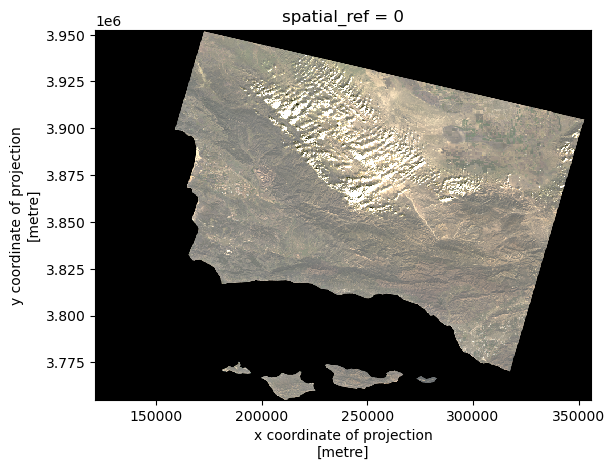

In [4]:
landsat[['red', 'green', 'blue']].to_array().plot.imshow(robust=True)

In a markdown cell write a brief explanation comparing the ouputs for parts (a) and (b).

4. False color image
Without creating any new variables, create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

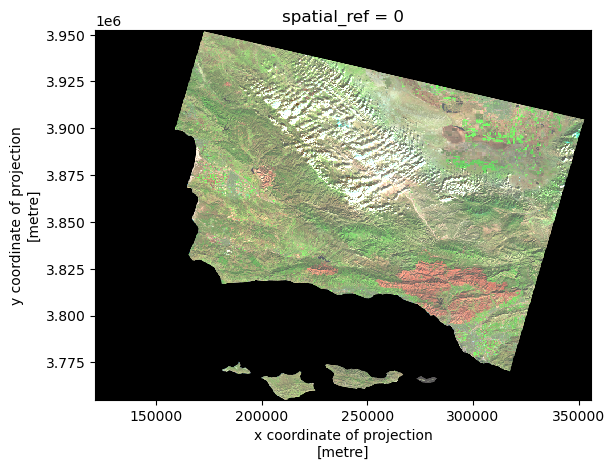

In [5]:
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust=True)

In [7]:
# Reproject data
thomas_boundary= thomas_boundary.to_crs("EPSG:3857")


In [8]:
# landsat.rio.crs
# landsat.rio.write_crs(4326, inplace=True)
landsat = landsat.rio.reproject("EPSG:3857")

In [9]:
landsat.rio.crs == thomas_boundary.crs

True

5. Map
Create a map showing the shortwave infrared/near-infrared/red false color image together with the Thomas Fire perimeter. Customize it appropriately including, at least, an informative title and legend.

Write a figure description for the map including a brief explanation of how false color imagery is being used.

In [ ]:
# landsat_array = landsat[['swir22', 'nir08', 'red']].to_array()

In [ ]:
# landsat.rio.bounds()
# bbox_test = (121170.0, 3952530.0, 356070.0, 3755160.0)

In [ ]:
# bbox = box(*landsat.rio.bounds())
# thomas_bbox = gpd.GeoDataFrame(geometry = [bbox_test],  # Assign geometry column
#                                 crs = thomas_boundary.crs)
# thomas_boundary.plot()

In [ ]:
# thomas_clip = gpd.clip(thomas_boundary, thomas_bbox)
# thomas_clip.plot()

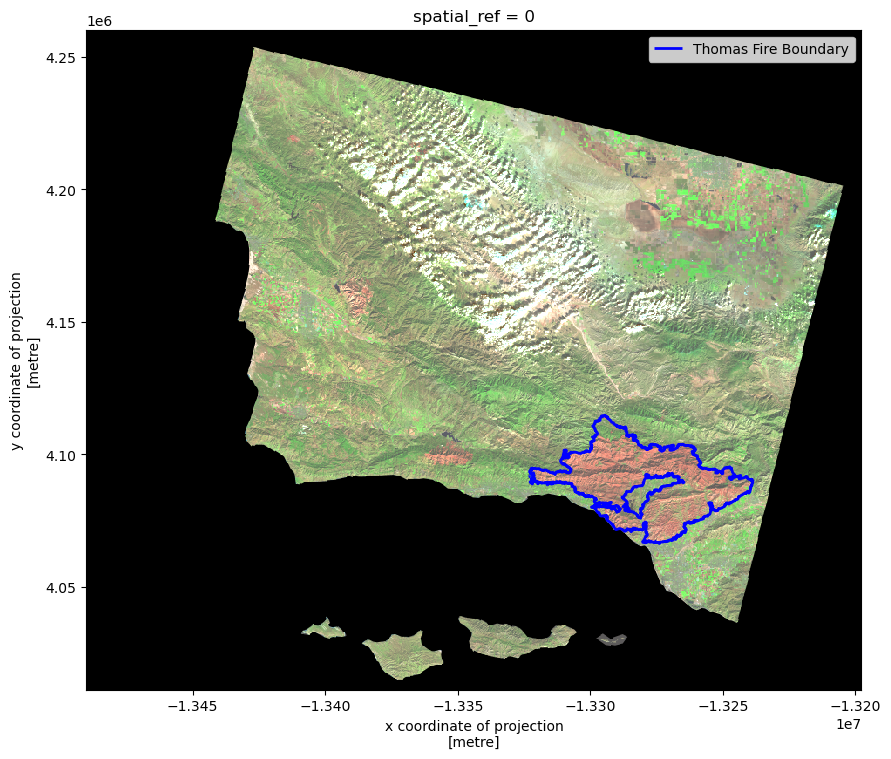

In [10]:
# Initialize figure
fig, ax = plt.subplots(figsize=(10,10))

# Remove axis for a cleaner map and set title
ax.set_title('Thomas fire boundary map',
            fontsize=14)

landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(ax = ax, robust = True)

thomas_boundary.boundary.plot(ax=ax, edgecolor='blue', linewidth=2, label='Thomas Fire Boundary')

ax.legend()

# landsat_array.plot.imshow(robust=True, ax=ax)

# landsat_array.plot(kind = 'imshow',
#                     ax=ax)

# Plot NY state and color by number of spills 
# thomas_clip.plot(ax=ax,
#                 legend=True,
#                 color='whitesmoke',
#                 edgecolor='0.7')

plt.show()